In [20]:
import tensorflow as tf
from tensorflow.keras import backend, models, layers, optimizers
import numpy as np
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from IPython.display import display
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, shutil
from tensorflow.keras.models import Model
np.random.seed(42)

In [21]:
base_dir = '/Users/DEVIL/Desktop/fruits-360'
train_dir = os.path.join(base_dir, 'Training')
test_dir =  os.path.join(base_dir, 'Test')
validation_dir=  os.path.join(base_dir, 'Validation')

In [72]:
# base_dir = '/Users/DEVIL/Desktop/fruit_new'
# os.mkdir(base_dir)

In [73]:
# train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

# validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

# test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

In [74]:
# train_apple_dir = os.path.join(train_dir, 'apple')
# os.mkdir(train_apple_dir)

# train_orange_dir = os.path.join(train_dir, 'orange')
# os.mkdir(train_orange_dir)

# validation_apple_dir = os.path.join(validation_dir, 'apple')
# os.mkdir(validation_apple_dir)

# validation_orange_dir = os.path.join(validation_dir, 'orange')
# os.mkdir(validation_orange_dir)

# test_apple = os.path.join(test_dir, 'apple')
# os.mkdir(test_apple)

# test_orange = os.path.join(test_dir,'orange')
# os.mkdir(test_orange)

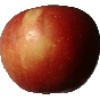

In [127]:
path = '/Users/DEVIL/Desktop/fruits-360/Training/Apple Braeburn/'
imgs = []
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    imgs.append(Image.open(os.path.join(path,f)))
    
    
img = (imgs[0])
img

In [111]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(100,100,3)))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(131, activation='softmax'))

In [112]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_384 (Conv2D)          (None, 98, 98, 32)        896       
_________________________________________________________________
dropout_6 (Dropout)          (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 76832)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 76832)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               39338496  
_________________________________________________________________
dense_17 (Dense)             (None, 131)              

In [113]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['acc'])

In [114]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True) 

test_datagen = ImageDataGenerator(rescale=1./255) 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=20,
    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=20,
    class_mode='categorical')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [115]:
for data_batch, labels_batch in test_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data batch shape: (20, 100, 100, 3)
labels batch shape (20, 131)


In [116]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data batch shape: (20, 100, 100, 3)
labels batch shape (20, 131)


In [117]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=10, validation_data=test_generator, validation_steps=50)

Epoch 1/10


E:\Anaconda\envs\virtual_workspace\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 [==============================] - 88s 873ms/step - loss: 9.9259 - acc: 0.0610 - val_loss: 3.8321 - val_acc: 0.1860
Epoch 2/10
100/100 [==============================] - 87s 866ms/step - loss: 2.8239 - acc: 0.2865 - val_loss: 2.4868 - val_acc: 0.3760
Epoch 3/10
100/100 [==============================] - 87s 867ms/step - loss: 1.7769 - acc: 0.4880 - val_loss: 1.6758 - val_acc: 0.5780
Epoch 4/10
100/100 [==============================] - 87s 868ms/step - loss: 1.2872 - acc: 0.6140 - val_loss: 1.2450 - val_acc: 0.6890
Epoch 5/10
100/100 [==============================] - 97s 968ms/step - loss: 1.0155 - acc: 0.6920 - val_loss: 1.0834 - val_acc: 0.7100
Epoch 6/10
100/100 [==============================] - 89s 890ms/step - loss: 0.8763 - acc: 0.7330 - val_loss: 0.9309 - val_acc: 0.7470
Epoch 7/10
100/100 [==============================] - 104s 1s/step - loss: 0.6890 - acc: 0.7815 - val_loss: 0.7777 - val_acc: 0.8060
Epoch 8/10
100/100 [==============================] - 93s 928ms/step

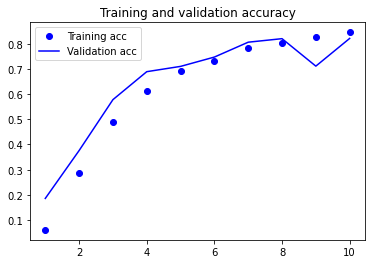

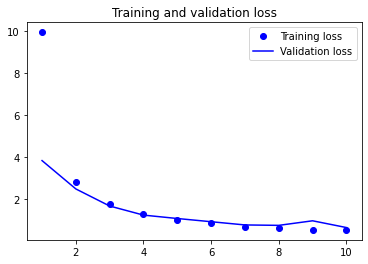

In [118]:
import matplotlib.pyplot as plt

acc= history.history['acc']
val_acc= history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label ='Training acc')
plt.plot(epochs, val_acc, 'b', label ='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label ='Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [130]:
model.save('Fruit_classification.model')

INFO:tensorflow:Assets written to: Fruit_classification.model\assets
